In [3]:
import os
print(os.listdir())

['.config', 'Products.csv', 'Transactions.csv', '.ipynb_checkpoints', 'Customers.csv']


In [4]:
import pandas as pd

customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")


# Display some rows to confirm the readability of all three data sets few
customers.head(), products.head(), transactions.head()




(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  10-07-2022
 1      C0002      Elizabeth Lutz           Asia  13-02-2022
 2      C0003      Michael Rivera  South America  07-03-2024
 3      C0004  Kathleen Rodriguez  South America  09-10-2022
 4      C0005         Laura Weber           Asia  15-08-2022,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID   TransactionDate  Quantity  TotalValue  \
 0        T00001      C0199      P067  25-08-2024 12:38         1      300.68   
 1        T00112      C0146      P067  27-05-2024 22:23         1      300.68   
 2        T00166      C0127      P0

In [5]:
print("Customers Dataset:")
print(customers.info())
print("\nProducts Dataset:")
print(products.info())
print("\nTransactions Dataset:")
print(transactions.info())

# this is  to know the datatypes and columns of all three datasets

Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          

In [6]:
print("Missing Values in Customers:")
print(customers.isnull().sum())

print("\nMissing Values in Products:")
print(products.isnull().sum())

print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())


#to handle missing values and it will help to keep
#the datasets clean and brief

Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [11]:
print("Duplicate Rows in Customers:", customers.duplicated().sum())
print("Duplicate Rows in Products:", products.duplicated().sum())
print("Duplicate Rows in Transactions:", transactions.duplicated().sum())

# the duplicated method is used to find all duplicate values and it also hepls to
# keep the data clean.
# However there are no duplicate values here, if founded then we can remove them
# by using drop() method and we have to pass "True" signal.

# for example
# customers.drop_duplicates(inplace=True)
# products.drop_duplicates(inplace=True)
# transactions.drop_duplicates(inplace=True)



Duplicate Rows in Customers: 0
Duplicate Rows in Products: 0
Duplicate Rows in Transactions: 0


In [14]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], dayfirst=True, errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], dayfirst=True, errors='coerce')



In [15]:
print(customers[customers['SignupDate'].isna()])
print(transactions[transactions['TransactionDate'].isna()])


Empty DataFrame
Columns: [CustomerID, CustomerName, Region, SignupDate]
Index: []
Empty DataFrame
Columns: [TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, Price]
Index: []


In [16]:
customers.dropna(subset=['SignupDate'], inplace=True)
transactions.dropna(subset=['TransactionDate'], inplace=True)


In [17]:
min_date = transactions['TransactionDate'].min()
transactions['TransactionDate'].fillna(min_date, inplace=True)


<ipython-input-17-0d96882562fa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transactions['TransactionDate'].fillna(min_date, inplace=True)


In [18]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

#to ensure proper handling of time , because all some
# of the dates are not in same format


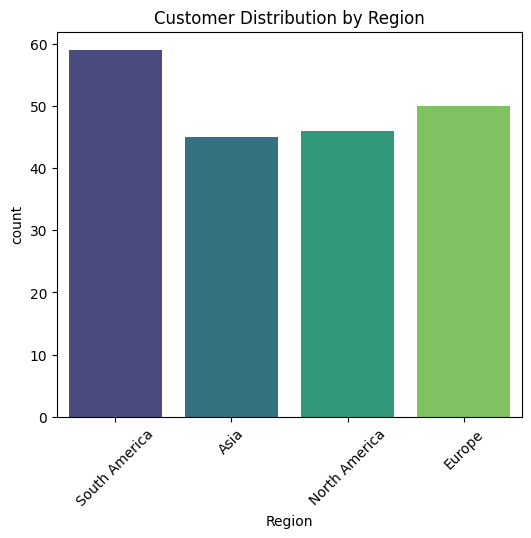

In [29]:
# data visualisation by using visualization libraries matplotlib and seaborn

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.countplot(x="Region", data=customers, hue="Region", palette="viridis", legend=False)
plt.title("Customer Distribution by Region")
plt.xticks(rotation=45)
plt.show()


<ipython-input-31-9a640a45b921>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products["ProductName"], x=top_products["Quantity"], palette="coolwarm")


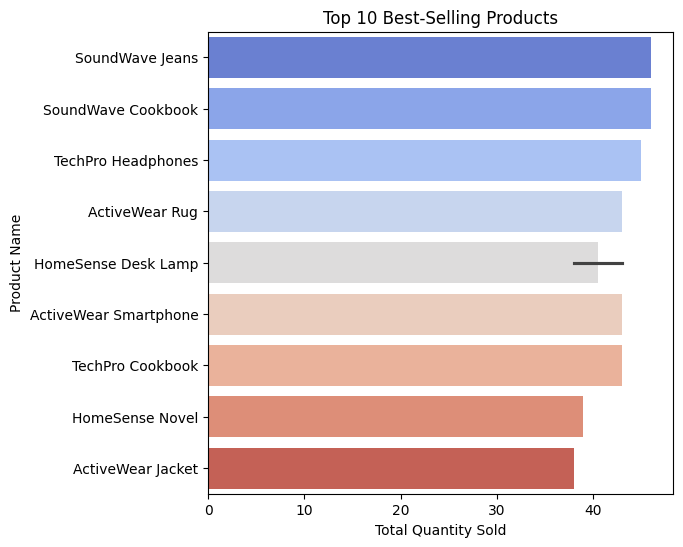

In [31]:
# top 10 best selling product
top_products = transactions.groupby('ProductID')['Quantity'].sum().reset_index()
top_products = top_products.merge(products, on="ProductID")
top_products = top_products.sort_values(by="Quantity", ascending=False).head(10)

plt.figure(figsize=(6, 6))
sns.barplot(y=top_products["ProductName"], x=top_products["Quantity"], palette="coolwarm")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.title("Top 10 Best-Selling Products")
plt.show()


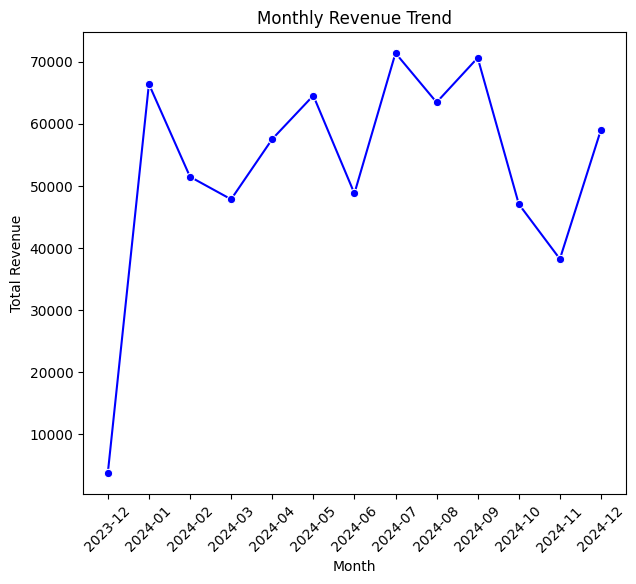

In [34]:
#Monthly Revenue Trend
#This visualizes revenue trends over time

transactions['Month'] = transactions['TransactionDate'].dt.to_period('M').astype(str)
monthly_revenue = transactions.groupby('Month')['TotalValue'].sum().reset_index()

plt.figure(figsize=(7, 6))
sns.lineplot(data=monthly_revenue, x="Month", y="TotalValue", marker="o", color="blue")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Monthly Revenue Trend")
plt.show()




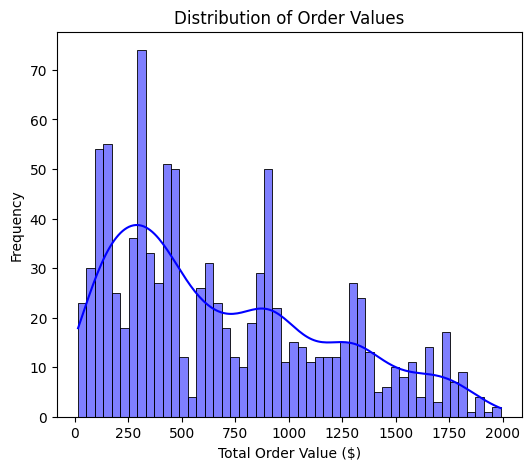

In [36]:
plt.figure(figsize=(6, 5))
sns.histplot(transactions['TotalValue'], bins=50, kde=True, color="blue")
plt.xlabel("Total Order Value ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Order Values")
plt.show()

# this is done due to find average order value per customer


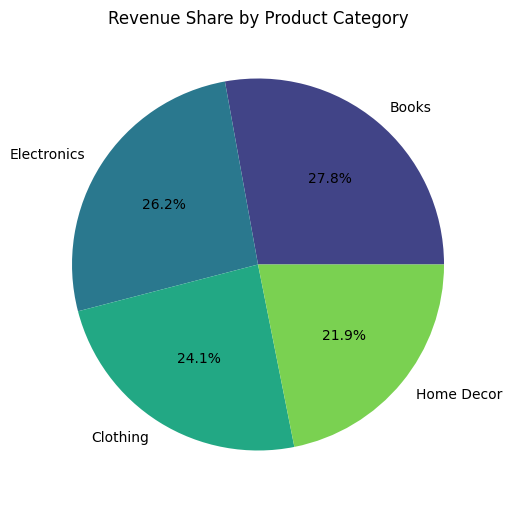

In [38]:
category_revenue = transactions.merge(products, on="ProductID").groupby("Category")["TotalValue"].sum().reset_index()
category_revenue = category_revenue.sort_values("TotalValue", ascending=False)

plt.figure(figsize=(6,7))
plt.pie(category_revenue["TotalValue"], labels=category_revenue["Category"], autopct="%1.1f%%", colors=sns.color_palette("viridis", len(category_revenue)))
plt.title("Revenue Share by Product Category")
plt.show()

#this code segment helps to find the most profitable product categories
